In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Setup

In [3]:
# measurement matrix
A = np.random.normal(0, np.sqrt(1/500), (500,2000))
# 50-sparse signal
x = np.random.normal(0, np.sqrt(1/50) , (2000,1)) 
zero_indices = np.random.choice(np.arange(2000),replace=False,size=int(1950)) #1950 random indices
x[zero_indices] = 0 
# noise
e = np.random.normal(0, np.sqrt(0.5/500), (500,1))
# noisy measurement
y = A@x + e

# Part b): l2 Regularization

In [4]:

# singular value decomposition of A (Vh is the transpose of V)
U, S, Vt = np.linalg.svd(A, full_matrices=False)
V = Vt.T

# range of lambda and alpha (step size) values
lambda_iter= np.logspace(-5, 5, 20) #logarithmic scale

mse=[]
for lam in tqdm(lambda_iter):    
    x_rec = V @ np.diag((S**2 + lam)**(-1)) @ np.diag(S) @ U.T @ y
    mse.append(np.linalg.norm(x-x_rec)**2) 

100%|██████████| 20/20 [00:03<00:00,  5.27it/s]


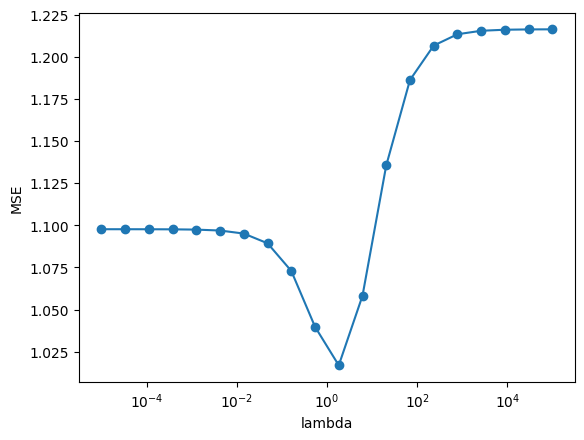

In [5]:
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.xscale('log')
plt.plot(lambda_iter,mse,marker="o")
plt.show()

# Part c): l1 Regularization

In [31]:
#derivative of function 
def derivative(x):
    return A.T@(A@x-y)

#Soft Thresholding Operator
def STO(x,lamda,alpha):
    c=lamda*alpha
    x[(x>=-c)&(x<=c)]=0
    x[x<-c]+=c
    x[x>c]-=c
    return x

In [32]:
max_iter=100

#Range of lambda and alpha (step size) values
lambda_iter= np.logspace(-5, 1, 20) #logarithmic scale
alpha_iter= np.logspace(-4, 1, 20) #logarithmic scale

mse=[]

for lamda in tqdm(lambda_iter):
    
    temp_mse=[]
    
    for alpha in alpha_iter:

        #initialize x: x_0=0
        x_k=np.zeros((2000,1))

        for _ in range(max_iter):
            x_k-=alpha*derivative(x_k) #step update 
            x_k=STO(x_k,lamda,alpha) #soft thresholding
            
        temp_mse.append(np.linalg.norm(x-x_k)**2) 
        
    #store lowest error
    mse.append(np.min(temp_mse))


100%|██████████| 20/20 [17:52<00:00, 53.62s/it]


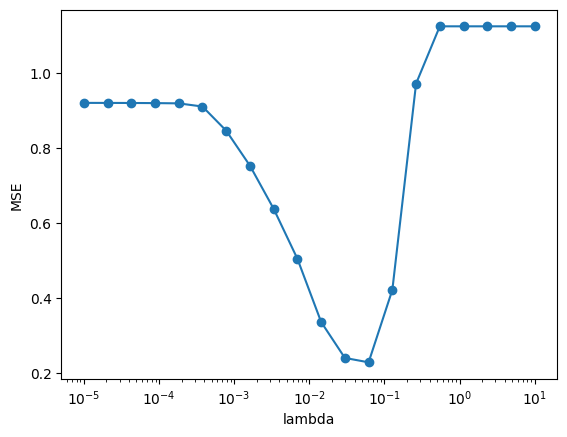

In [33]:
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.xscale('log')
plt.plot(lambda_iter,mse,marker="o")
plt.show()
